# **Time Domain Feature**

## 0. Start

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_time=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/MLMA Project/BS-HMS-Dataset/time_domain_features")

In [ ]:
# drop participant 20, 21 , 27 since they have too many missing values
rows_to_drop = ['Test20', 'Test21', 'Test27']
df_time_filtered = df_time[~df_time['Test'].str.contains('|'.join(rows_to_drop))]
df_time_filtered

,Unnamed: 0,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,...,AF4_max,AF4_activity,AF4_mobility,AF4_complexity,AF4_ar_coeff_0,AF4_ar_coeff_1,AF4_ar_coeff_2,AF4_ar_coeff_3,AF4_ar_coeff_4,Test
0,0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,...,4798.461426,1955.207164,0.201175,5.853881,1.888919,-1.916397,1.774889,-1.162047,0.414635,EEG_Test0_1
1,1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,...,5405.641113,4047.042955,0.181730,6.655339,1.869903,-1.917447,1.803922,-1.177878,0.421499,EEG_Test0_2
2,2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,...,4456.922852,788.581256,0.362081,3.528739,1.719312,-1.716449,1.651069,-1.060818,0.406884,EEG_Test0_3
3,3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,...,7725.640625,30770.363380,0.065568,16.047249,2.014694,-1.962541,1.826205,-1.251982,0.373620,EEG_Test0_4
4,4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,...,5711.794922,9459.787110,0.097349,11.212047,1.916121,-1.784461,1.639423,-1.070856,0.299771,EEG_Test0_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,...,4534.358887,1341.930166,0.288382,4.671318,1.619370,-1.575834,1.591902,-1.013965,0.378527,EEG_Test26_4
212,212,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,...,4649.230469,2125.336360,0.194158,6.114867,1.799081,-1.684543,1.536058,-0.908229,0.257632,EEG_Test26_5
213,213,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,...,5397.948730,4823.841089,0.127178,9.549253,1.850852,-1.822298,1.738571,-1.141967,0.374842,EEG_Test26_6
214,214,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,...,4794.358887,1804.680486,0.212828,5.879350,1.683692,-1.604122,1.484709,-0.874587,0.310306,EEG_Test26_7


In [ ]:
metadata=pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/MLMA Project/BS-HMS-Dataset/Emotiv-based-Data/Demographic Details of Participants.xlsx")
metadata.columns=[
    "User ID", "Age", "Gender", "Dominant Hand", "Date / Time",
    "Video ID 1", "Video ID 2", "Date / Time", "Video ID 3", "Video ID 4"]
metadata.head()

,User ID,Age,Gender,Dominant Hand,Date / Time,Video ID 1,Video ID 2,Date / Time,Video ID 3,Video ID 4
0,Test0,27,Male,Right,08/18/2019/2:00:00 PM,15,8,08/23/2019/3:40:00 PM,2.0,11.0
1,Test1,24,Male,Right,08/18/2019/3:20:00 PM,5,5,08/22/2019/4:30:00 PM,9.0,5.0
2,test2,30,Female,Right,08/19/2019/4:20:00 PM,8,11,08/20/2019/4:40:00 PM,5.0,2.0
3,test3,25,Male,Right,08/20/2019/1:28:00 PM,14,7,08/28/2019/3:15:00 PM,15.0,1.0
4,test4,24,Male,Left,08/21/2019/3:20:00 PM,12,6,08/30/2019/5:10:00 PM,15.0,19.0


In [ ]:
metadata_video_id=metadata[["User ID","Video ID 1", "Video ID 2", "Video ID 3", "Video ID 4"]]
metadata_video_id=metadata_video_id.dropna()
metadata_video_id.head()

,User ID,Video ID 1,Video ID 2,Video ID 3,Video ID 4
0,Test0,15,8,2.0,11.0
1,Test1,5,5,9.0,5.0
2,test2,8,11,5.0,2.0
3,test3,14,7,15.0,1.0
4,test4,12,6,15.0,19.0


In [ ]:
metadata_video_id_list = metadata_video_id.drop('User ID', axis=1).values.flatten().tolist()
metadata_video_id_list = [int(item) for item in metadata_video_id_list for _ in range(2)] #to int and double the time
metadata_video_id_list = [1 if item in [1,2,5,6,13,14,15,16,17,18] else 0 for item in metadata_video_id_list] #map
df_time_filtered["Emotion"]=metadata_video_id_list
df_time_filtered

<ipython-input-45-f4569d360946>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_filtered["Emotion"]=metadata_video_id_list


,Unnamed: 0,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,...,AF4_activity,AF4_mobility,AF4_complexity,AF4_ar_coeff_0,AF4_ar_coeff_1,AF4_ar_coeff_2,AF4_ar_coeff_3,AF4_ar_coeff_4,Test,Emotion
0,0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,...,1955.207164,0.201175,5.853881,1.888919,-1.916397,1.774889,-1.162047,0.414635,EEG_Test0_1,1
1,1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,...,4047.042955,0.181730,6.655339,1.869903,-1.917447,1.803922,-1.177878,0.421499,EEG_Test0_2,1
2,2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,...,788.581256,0.362081,3.528739,1.719312,-1.716449,1.651069,-1.060818,0.406884,EEG_Test0_3,0
3,3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,...,30770.363380,0.065568,16.047249,2.014694,-1.962541,1.826205,-1.251982,0.373620,EEG_Test0_4,0
4,4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,...,9459.787110,0.097349,11.212047,1.916121,-1.784461,1.639423,-1.070856,0.299771,EEG_Test0_5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,...,1341.930166,0.288382,4.671318,1.619370,-1.575834,1.591902,-1.013965,0.378527,EEG_Test26_4,1
212,212,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,...,2125.336360,0.194158,6.114867,1.799081,-1.684543,1.536058,-0.908229,0.257632,EEG_Test26_5,0
213,213,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,...,4823.841089,0.127178,9.549253,1.850852,-1.822298,1.738571,-1.141967,0.374842,EEG_Test26_6,0
214,214,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,...,1804.680486,0.212828,5.879350,1.683692,-1.604122,1.484709,-0.874587,0.310306,EEG_Test26_7,1


In [ ]:
df_time_filtered=df_time_filtered.drop(columns=["Unnamed: 0","Test"])
df_time_filtered

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,AF4_max,AF4_activity,AF4_mobility,AF4_complexity,AF4_ar_coeff_0,AF4_ar_coeff_1,AF4_ar_coeff_2,AF4_ar_coeff_3,AF4_ar_coeff_4,Emotion
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,4798.461426,1955.207164,0.201175,5.853881,1.888919,-1.916397,1.774889,-1.162047,0.414635,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,5405.641113,4047.042955,0.181730,6.655339,1.869903,-1.917447,1.803922,-1.177878,0.421499,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,4456.922852,788.581256,0.362081,3.528739,1.719312,-1.716449,1.651069,-1.060818,0.406884,0
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,7725.640625,30770.363380,0.065568,16.047249,2.014694,-1.962541,1.826205,-1.251982,0.373620,0
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,5711.794922,9459.787110,0.097349,11.212047,1.916121,-1.784461,1.639423,-1.070856,0.299771,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,4534.358887,1341.930166,0.288382,4.671318,1.619370,-1.575834,1.591902,-1.013965,0.378527,1
212,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,4649.230469,2125.336360,0.194158,6.114867,1.799081,-1.684543,1.536058,-0.908229,0.257632,0
213,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,5397.948730,4823.841089,0.127178,9.549253,1.850852,-1.822298,1.738571,-1.141967,0.374842,0
214,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,4794.358887,1804.680486,0.212828,5.879350,1.683692,-1.604122,1.484709,-0.874587,0.310306,1


## Train Test Split Method

In [ ]:
folder = [num for num in range(1, 26) for _ in range(8)]
df_time_filtered["Folder"]=folder
df_time_filtered

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,AF4_activity,AF4_mobility,AF4_complexity,AF4_ar_coeff_0,AF4_ar_coeff_1,AF4_ar_coeff_2,AF4_ar_coeff_3,AF4_ar_coeff_4,Emotion,Folder
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,1955.207164,0.201175,5.853881,1.888919,-1.916397,1.774889,-1.162047,0.414635,1,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,4047.042955,0.181730,6.655339,1.869903,-1.917447,1.803922,-1.177878,0.421499,1,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,788.581256,0.362081,3.528739,1.719312,-1.716449,1.651069,-1.060818,0.406884,0,1
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,30770.363380,0.065568,16.047249,2.014694,-1.962541,1.826205,-1.251982,0.373620,0,1
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,9459.787110,0.097349,11.212047,1.916121,-1.784461,1.639423,-1.070856,0.299771,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,1341.930166,0.288382,4.671318,1.619370,-1.575834,1.591902,-1.013965,0.378527,1,25
212,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,2125.336360,0.194158,6.114867,1.799081,-1.684543,1.536058,-0.908229,0.257632,0,25
213,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,4823.841089,0.127178,9.549253,1.850852,-1.822298,1.738571,-1.141967,0.374842,0,25
214,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,1804.680486,0.212828,5.879350,1.683692,-1.604122,1.484709,-0.874587,0.310306,1,25


In [ ]:
import random
folder_names = [i for i in range(1, 27)]

random.shuffle(folder_names)

# 80/20 split
train_split = int(0.8 * len(folder_names))  # 80% for training

train_folders = folder_names[:train_split]
test_folders = folder_names[train_split:]

print(train_folders)
print(test_folders)

[24, 17, 10, 14, 4, 8, 7, 18, 16, 1, 6, 12, 26, 5, 3, 19, 15, 20, 11, 21]
[2, 25, 23, 13, 9, 22]


In [ ]:
train_time = df_time_filtered[df_time_filtered['Folder'].isin(train_folders)]
X_train_time =train_time.iloc[:,:-2]
y_train_time=train_time.iloc[:,-2]

test_time = df_time_filtered[df_time_filtered['Folder'].isin(test_folders)]
X_test_time =test_time.iloc[:,:-2]
y_test_time=test_time.iloc[:,-2]

# val = df_time_filtered[df_time_filtered['Folder'].isin(valid_folders)]
# X_val =val.iloc[:,:-2]
# y_val=val.iloc[:,-2]

## Naive Bayes + 10 fold Cross Validation

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def create_grid_search_nb_model():
    nb_pipeline = make_pipeline(StandardScaler(), GaussianNB())
    param_grid = {
        'gaussiannb__var_smoothing': np.logspace(0, -9, num=100)
    }
    grid_search = GridSearchCV(nb_pipeline, param_grid, cv=3, scoring='accuracy', verbose=1)
    return grid_search

In [ ]:
fold = 10
cv_scores = []
best_model_time = None
best_accuracy_time = 0

for i in range(fold):
    random.shuffle(train_folders)

    # 90/10 split
    train_split_cv = int(0.9 * len(train_folders))  # 90% for training

    train_folders_cv = train_folders[:train_split_cv]
    val_folders_cv = train_folders[train_split_cv:]

    train_cv = train_time[train_time['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_time[train_time['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    grid_search_model = create_grid_search_nb_model()

    grid_search_model.fit(X_train_cv, y_train_cv)

    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")

    best_model = grid_search_model.best_estimator_

    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    if val_accuracy > best_accuracy_time:
        best_accuracy_time = val_accuracy
        best_model_time = best_model

print(f"Best validation accuracy: {best_accuracy_time * 100:.2f}%")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 1: {'gaussiannb__var_smoothing': 0.2848035868435802}
Fold 1 completed. Validation accuracy: 81.25%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 2: {'gaussiannb__var_smoothing': 0.2848035868435802}
Fold 2 completed. Validation accuracy: 68.75%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 3: {'gaussiannb__var_smoothing': 0.12328467394420659}
Fold 3 completed. Validation accuracy: 62.50%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 4: {'gaussiannb__var_smoothing': 0.01873817422860384}
Fold 4 completed. Validation accuracy: 37.50%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 5: {'gaussiannb__var_smoothing': 0.23101297000831597}
Fold 5 completed. Validation accuracy: 68.75%
Fitting 3 folds for each of 100 candidates, totalling 300 fits

In [ ]:
print(train_folders_cv)
print(val_folders_cv)

[7, 24, 20, 3, 17, 14, 21, 10, 16, 19, 6, 11, 8, 15, 1, 18, 5, 26]
[4, 12]


# **Frequency Domain Feature**

## 1. Load Data

In [ ]:
df_frequency=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/MLMA Project/BS-HMS-Dataset/frequency_domain_features")

In [ ]:
rows_to_drop = ['Test20', 'Test21', 'Test27']
df_frequency_filtered = df_frequency[~df_frequency['Test'].str.contains('|'.join(rows_to_drop))]
df_frequency_filtered.head()

,Unnamed: 0,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,...,F8_Beta_power,F8_Gamma_power,F8_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy,Test
0,0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,...,1827.793507,372.815243,2.927640,722.066811,73.374318,26.934085,39.510158,12.868163,3.228577,EEG_Test0_1
1,1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,...,50.502736,18.238877,3.321144,988.999364,104.930425,34.668521,50.649449,20.801604,2.722334,EEG_Test0_2
2,2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,...,246.406774,58.009400,3.251759,439.611659,62.292803,21.426163,42.629270,21.327653,3.976593,EEG_Test0_3
3,3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,...,173.137554,37.285689,2.788485,6092.273632,235.566933,47.641229,44.089441,18.788212,2.098816,EEG_Test0_4
4,4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,...,36.050785,14.784819,3.466234,2339.739461,143.981679,26.881912,31.913806,12.180580,2.435904,EEG_Test0_5


In [ ]:
df_frequency_filtered["Emotion"]=metadata_video_id_list
df_frequency_filtered=df_frequency_filtered.drop(columns=["Unnamed: 0","Test"])
df_frequency_filtered

<ipython-input-55-942389ec613d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency_filtered["Emotion"]=metadata_video_id_list


,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,F8_Beta_power,F8_Gamma_power,F8_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy,Emotion
0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,1200.003919,...,1827.793507,372.815243,2.927640,722.066811,73.374318,26.934085,39.510158,12.868163,3.228577,1
1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,35.874422,...,50.502736,18.238877,3.321144,988.999364,104.930425,34.668521,50.649449,20.801604,2.722334,1
2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,296.967472,...,246.406774,58.009400,3.251759,439.611659,62.292803,21.426163,42.629270,21.327653,3.976593,0
3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,492.119875,...,173.137554,37.285689,2.788485,6092.273632,235.566933,47.641229,44.089441,18.788212,2.098816,0
4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,19.628216,...,36.050785,14.784819,3.466234,2339.739461,143.981679,26.881912,31.913806,12.180580,2.435904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,3988.090799,66.729897,26.714639,52.603418,17.757124,2.581967,1128.316705,100.116058,25.147104,78.176664,...,101.401419,55.028680,2.829569,549.013560,50.597313,19.869369,32.719328,26.388016,3.308674,1
212,328.027554,24.065557,12.305281,11.390863,4.855920,2.003684,1214.553582,67.621555,24.157729,25.644321,...,23.522324,10.241707,3.310003,806.514682,67.316092,34.419324,31.208080,14.308119,3.121754,0
213,196.552634,22.197301,10.330547,11.698973,5.910977,2.469211,2412.923177,94.241990,34.393498,61.537160,...,33.520476,14.401712,2.614483,929.661063,66.896045,27.174102,28.494446,13.939820,2.230978,0
214,125.616279,14.811609,14.844813,13.978226,6.082713,3.141940,1198.985129,74.641414,33.214891,36.852710,...,22.146428,11.727418,2.334435,346.849914,31.735962,34.137930,32.800019,15.050338,2.446117,1


## 2. Train Test Split

In [ ]:
df_frequency_filtered["Folder"]=folder
df_frequency_filtered

,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,F8_Gamma_power,F8_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy,Emotion,Folder
0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,1200.003919,...,372.815243,2.927640,722.066811,73.374318,26.934085,39.510158,12.868163,3.228577,1,1
1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,35.874422,...,18.238877,3.321144,988.999364,104.930425,34.668521,50.649449,20.801604,2.722334,1,1
2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,296.967472,...,58.009400,3.251759,439.611659,62.292803,21.426163,42.629270,21.327653,3.976593,0,1
3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,492.119875,...,37.285689,2.788485,6092.273632,235.566933,47.641229,44.089441,18.788212,2.098816,0,1
4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,19.628216,...,14.784819,3.466234,2339.739461,143.981679,26.881912,31.913806,12.180580,2.435904,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,3988.090799,66.729897,26.714639,52.603418,17.757124,2.581967,1128.316705,100.116058,25.147104,78.176664,...,55.028680,2.829569,549.013560,50.597313,19.869369,32.719328,26.388016,3.308674,1,25
212,328.027554,24.065557,12.305281,11.390863,4.855920,2.003684,1214.553582,67.621555,24.157729,25.644321,...,10.241707,3.310003,806.514682,67.316092,34.419324,31.208080,14.308119,3.121754,0,25
213,196.552634,22.197301,10.330547,11.698973,5.910977,2.469211,2412.923177,94.241990,34.393498,61.537160,...,14.401712,2.614483,929.661063,66.896045,27.174102,28.494446,13.939820,2.230978,0,25
214,125.616279,14.811609,14.844813,13.978226,6.082713,3.141940,1198.985129,74.641414,33.214891,36.852710,...,11.727418,2.334435,346.849914,31.735962,34.137930,32.800019,15.050338,2.446117,1,25


In [ ]:
train_frequency = df_frequency_filtered[df_frequency_filtered['Folder'].isin(train_folders)]
X_train_frequency =train_frequency.iloc[:,:-2]
y_train_frequency=train_frequency.iloc[:,-2]

test_frequency = df_frequency_filtered[df_frequency_filtered['Folder'].isin(test_folders)]
X_test_frequency =test_frequency.iloc[:,:-2]
y_test_frequency=test_frequency.iloc[:,-2]
X_test_frequency

,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,F8_Alpha_power,F8_Beta_power,F8_Gamma_power,F8_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy
8,286.386772,27.753869,21.557389,18.013702,6.979450,3.615957,2084.980352,196.166860,66.622903,63.361610,...,517.763196,325.683492,67.939672,3.115632,511.809114,35.502283,31.033963,25.940323,10.194938,2.990726
9,372.870192,39.531936,15.415430,18.058973,7.761094,3.598315,8501.227910,472.603947,150.935713,113.058666,...,408.303805,421.595572,91.802570,3.430137,405.591805,48.128947,20.748353,24.285197,10.205416,3.441735
10,432.558118,52.141950,22.827832,33.867453,15.502903,3.364183,7343.717702,123.248664,35.189129,59.740641,...,121.651033,135.182313,36.739001,2.279239,981.430346,73.400373,37.743336,50.220918,22.176471,2.245883
11,957.694954,91.955168,30.008158,55.161980,28.516992,3.547625,10068.866952,782.714091,260.621169,348.620493,...,199.592524,225.978113,48.531411,3.582011,682.975456,89.638540,36.629004,61.050128,31.516824,3.854116
12,59.724494,10.395904,14.283838,12.015533,4.979389,3.962638,207.156441,23.382830,19.772622,21.631396,...,93.496140,50.524805,20.901764,2.472734,164.978709,25.056701,30.187411,23.341470,8.610260,3.528861
13,133.673449,19.031348,11.514707,13.657307,5.654816,3.895472,375.711314,35.342739,16.849474,27.250687,...,60.612003,41.616005,16.687764,3.263494,436.172019,51.458767,27.927364,40.315720,17.218726,3.199578
14,142.027854,17.477281,30.928270,21.211830,10.801993,3.605569,221.761820,26.816959,31.381346,33.249438,...,99.935286,113.790800,37.817349,3.456787,188.127459,26.522508,45.656590,30.427173,14.275394,3.282627
15,138.107000,21.762219,13.475231,16.280120,6.528106,3.744907,333.505685,36.269158,17.300992,28.734379,...,38.120697,46.056324,16.410601,3.214846,214.149967,38.036419,28.911121,57.338230,30.245076,4.409004
64,476.268038,61.876827,12.014584,21.944570,10.621916,3.868160,586.033876,62.019331,11.427435,21.367375,...,21.568185,35.725048,16.693592,3.182912,479.449170,59.151186,12.900778,25.184446,11.894422,3.710416
65,588.710348,74.273832,12.781042,19.162468,9.716209,3.834275,622.971441,71.990477,12.801946,17.303213,...,23.245092,30.984020,15.086241,2.938258,682.345481,73.829873,14.208714,22.573681,11.351621,3.075729


In [ ]:
train_frequency

,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,F8_Gamma_power,F8_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy,Emotion,Folder
0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,1200.003919,...,372.815243,2.927640,722.066811,73.374318,26.934085,39.510158,12.868163,3.228577,1,1
1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,35.874422,...,18.238877,3.321144,988.999364,104.930425,34.668521,50.649449,20.801604,2.722334,1,1
2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,296.967472,...,58.009400,3.251759,439.611659,62.292803,21.426163,42.629270,21.327653,3.976593,0,1
3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,492.119875,...,37.285689,2.788485,6092.273632,235.566933,47.641229,44.089441,18.788212,2.098816,0,1
4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,19.628216,...,14.784819,3.466234,2339.739461,143.981679,26.881912,31.913806,12.180580,2.435904,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,6326.160128,193.549611,26.761036,82.885729,54.676292,2.238760,4707.689534,140.878070,23.129301,64.781135,...,17.352076,3.354730,5792.151509,346.866605,90.682743,152.665687,79.734156,2.928540,1,24
204,8538.519858,885.032131,180.625882,124.254569,42.224136,3.138199,9246.374361,908.723745,186.997800,122.776429,...,40.125631,3.223009,10852.480425,1179.876697,245.474949,189.049707,68.410166,3.372090,0,24
205,4038.917633,320.460140,69.942242,82.857024,35.778619,2.443887,4039.388127,340.408761,67.598859,66.583571,...,32.352939,2.667449,6104.662289,454.230445,95.260876,121.182434,57.362452,2.709599,0,24
206,9870.610020,1594.732695,291.322622,177.250316,75.851110,2.515135,6982.563267,1560.209413,290.627391,123.882647,...,35.198372,2.951501,13348.647334,2079.760548,369.280094,189.515055,72.210042,2.689508,0,24


## 3. Naive Bayes + 10 fold Cross Validation

In [ ]:
cv_scores_frequency = []
best_model_frequency = None
best_accuracy_frequency = 0
train_folders_name = train_folders.copy()

for i in range(fold):
    random.shuffle(train_folders_name)

    # 90/10 split
    train_split_cv = int(0.9 * len(train_folders_name))  # 90% for training

    train_folders_cv = train_folders_name[:train_split_cv]
    val_folders_cv = train_folders_name[train_split_cv:]

    train_cv = train_frequency[train_frequency['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_frequency[train_frequency['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    grid_search_model = create_grid_search_nb_model()

    grid_search_model.fit(X_train_cv, y_train_cv)
    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")

    best_model = grid_search_model.best_estimator_

    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores_frequency.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    if val_accuracy > best_accuracy_frequency:
        best_accuracy_frequency = val_accuracy
        best_model_frequency = best_model

print(f"Best validation accuracy: {best_accuracy_frequency * 100:.2f}%")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 1: {'gaussiannb__var_smoothing': 0.1873817422860384}
Fold 1 completed. Validation accuracy: 43.75%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 2: {'gaussiannb__var_smoothing': 0.012328467394420659}
Fold 2 completed. Validation accuracy: 25.00%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 3: {'gaussiannb__var_smoothing': 0.0657933224657568}
Fold 3 completed. Validation accuracy: 62.50%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 4: {'gaussiannb__var_smoothing': 0.1873817422860384}
Fold 4 completed. Validation accuracy: 56.25%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 5: {'gaussiannb__var_smoothing': 0.1}
Fold 5 completed. Validation accuracy: 50.00%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters

# **Combined Features**

## 1. Concatenate Data

In [ ]:
df_time_filtered_incomplete=df_time_filtered.iloc[:,:-2]
df_time_frequency=pd.concat([df_time_filtered_incomplete, df_frequency_filtered], axis=1)
df_time_frequency

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,F8_Gamma_power,F8_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy,Emotion,Folder
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,372.815243,2.927640,722.066811,73.374318,26.934085,39.510158,12.868163,3.228577,1,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,18.238877,3.321144,988.999364,104.930425,34.668521,50.649449,20.801604,2.722334,1,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,58.009400,3.251759,439.611659,62.292803,21.426163,42.629270,21.327653,3.976593,0,1
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,37.285689,2.788485,6092.273632,235.566933,47.641229,44.089441,18.788212,2.098816,0,1
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,14.784819,3.466234,2339.739461,143.981679,26.881912,31.913806,12.180580,2.435904,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,55.028680,2.829569,549.013560,50.597313,19.869369,32.719328,26.388016,3.308674,1,25
212,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,10.241707,3.310003,806.514682,67.316092,34.419324,31.208080,14.308119,3.121754,0,25
213,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,14.401712,2.614483,929.661063,66.896045,27.174102,28.494446,13.939820,2.230978,0,25
214,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,11.727418,2.334435,346.849914,31.735962,34.137930,32.800019,15.050338,2.446117,1,25


## 2. Train Test Split

In [ ]:
train_time_frequency = df_time_frequency[df_time_frequency['Folder'].isin(train_folders)]
X_train_time_frequency =train_time_frequency.iloc[:,:-2]
y_train_time_frequency=train_time_frequency.iloc[:,-2]

test_time_frequency = df_time_frequency[df_time_frequency['Folder'].isin(test_folders)]
X_test_time_frequency =test_time_frequency.iloc[:,:-2]
y_test_time_frequency=test_time_frequency.iloc[:,-2]

In [ ]:
X_test_time_frequency

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,F8_Alpha_power,F8_Beta_power,F8_Gamma_power,F8_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy
8,4237.459595,23.514230,552.918990,4235.897461,4109.230469,4611.794922,552.918990,0.275458,4.340065,1.819586,...,517.763196,325.683492,67.939672,3.115632,511.809114,35.502283,31.033963,25.940323,10.194938,2.990726
9,4238.110528,25.949553,673.379301,4237.436035,4089.743408,4737.435547,673.379301,0.254055,4.724475,1.858417,...,408.303805,421.595572,91.802570,3.430137,405.591805,48.128947,20.748353,24.285197,10.205416,3.441735
10,4234.104078,34.928274,1219.984336,4233.846191,3768.205078,4737.435547,1219.984336,0.264979,4.769346,1.643700,...,121.651033,135.182313,36.739001,2.279239,981.430346,73.400373,37.743336,50.220918,22.176471,2.245883
11,4237.884736,42.084391,1771.095999,4235.897461,3396.923096,5335.897461,1771.095999,0.271029,4.698689,1.606309,...,199.592524,225.978113,48.531411,3.582011,682.975456,89.638540,36.629004,61.050128,31.516824,3.854116
12,4232.142454,13.862836,192.178219,4231.794922,4150.256348,4312.820312,192.178219,0.386095,3.221482,1.633915,...,93.496140,50.524805,20.901764,2.472734,164.978709,25.056701,30.187411,23.341470,8.610260,3.528861
13,4236.399436,16.640129,276.893882,4235.384277,4160.000000,4354.871582,276.893882,0.332916,3.694325,1.794830,...,60.612003,41.616005,16.687764,3.263494,436.172019,51.458767,27.927364,40.315720,17.218726,3.199578
14,4238.336263,21.993438,483.711295,4237.948730,3990.256348,4547.692383,483.711295,0.338336,3.708075,1.767503,...,99.935286,113.790800,37.817349,3.456787,188.127459,26.522508,45.656590,30.427173,14.275394,3.282627
15,4239.239969,18.415145,339.117552,4238.461426,4125.641113,4456.410156,339.117552,0.326416,3.748679,1.827282,...,38.120697,46.056324,16.410601,3.214846,214.149967,38.036419,28.911121,57.338230,30.245076,4.409004
64,4233.036191,27.045266,731.446388,4228.717773,4015.384521,4446.153809,731.446388,0.278986,4.404237,1.805130,...,21.568185,35.725048,16.693592,3.182912,479.449170,59.151186,12.900778,25.184446,11.894422,3.710416
65,4235.353861,30.618842,937.513468,4231.281738,3991.281982,4450.769043,937.513468,0.243429,4.927128,1.834492,...,23.245092,30.984020,15.086241,2.938258,682.345481,73.829873,14.208714,22.573681,11.351621,3.075729


## 3. Naive Bayes + 10 fold Cross Validation

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import random

cv_scores_time_frequency = []
best_model_time_frequency = 0
best_accuracy_time_frequency = 0
train_folders_name=train_folders.copy()

def create_grid_search_nb_model():
    nb_pipeline = make_pipeline(StandardScaler(), GaussianNB())
    param_grid = {
        'gaussiannb__var_smoothing': np.logspace(0, -9, num=100)
    }
    grid_search = GridSearchCV(nb_pipeline, param_grid, cv=3, scoring='accuracy', verbose=1)
    return grid_search

fold = 10
cv_scores_time_frequency = []
best_model_time_frequency = None
best_accuracy_time_frequency = 0

for i in range(fold):
    random.shuffle(train_folders_name)

    train_split_cv = int(0.9 * len(train_folders_name))
    train_folders_cv = train_folders_name[:train_split_cv]
    val_folders_cv = train_folders_name[train_split_cv:]

    train_cv = train_time_frequency[train_time_frequency['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_time_frequency[train_time_frequency['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    grid_search_model = create_grid_search_nb_model()
    grid_search_model.fit(X_train_cv, y_train_cv)

    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")

    best_model = grid_search_model.best_estimator_

    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores_time_frequency.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    if val_accuracy > best_accuracy_time_frequency:
        best_accuracy_time_frequency = val_accuracy
        best_model_time_frequency = best_model

print(f"Best validation accuracy: {best_accuracy_time_frequency * 100:.2f}%")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 1: {'gaussiannb__var_smoothing': 0.006579332246575682}
Fold 1 completed. Validation accuracy: 75.00%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 2: {'gaussiannb__var_smoothing': 0.01519911082952933}
Fold 2 completed. Validation accuracy: 62.50%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 3: {'gaussiannb__var_smoothing': 0.0533669923120631}
Fold 3 completed. Validation accuracy: 68.75%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 4: {'gaussiannb__var_smoothing': 0.04328761281083057}
Fold 4 completed. Validation accuracy: 50.00%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 5: {'gaussiannb__var_smoothing': 0.0657933224657568}
Fold 5 completed. Validation accuracy: 87.50%
Fitting 3 folds for each of 100 candidates, totalling 300 fit

In [ ]:
print(train_folders_cv)
print(val_folders_cv)

[4, 17, 8, 11, 26, 12, 16, 1, 14, 18, 3, 24, 20, 6, 10, 5, 21, 7]
[19, 15]


# **Theoretically Important Position Features only**

## 1. Extract Data

In [ ]:
df_time_frequency.columns

Index(['AF3_mean', 'AF3_std', 'AF3_var', 'AF3_median', 'AF3_min', 'AF3_max',
       'AF3_activity', 'AF3_mobility', 'AF3_complexity', 'AF3_ar_coeff_0',
       ...
       'F8_Gamma_power', 'F8_spectral_entropy', 'AF4_Delta_power',
       'AF4_Theta_power', 'AF4_Alpha_power', 'AF4_Beta_power',
       'AF4_Gamma_power', 'AF4_spectral_entropy', 'Emotion', 'Folder'],
      dtype='object', length=282)

In [ ]:
selected_columns = [col for col in df_time_frequency.columns if any(feature in col for feature in ['F3', 'F4', 'FC5', 'FC6', 'O1', 'O2', 'Emotion','Folder'])]
df_important_positions = df_time_frequency[selected_columns]
df_important_positions

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,F4_Gamma_power,F4_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy,Emotion,Folder
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,12.029786,3.181718,722.066811,73.374318,26.934085,39.510158,12.868163,3.228577,1,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,12.436428,3.171125,988.999364,104.930425,34.668521,50.649449,20.801604,2.722334,1,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,14.274776,3.909695,439.611659,62.292803,21.426163,42.629270,21.327653,3.976593,0,1
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,15.984435,2.310437,6092.273632,235.566933,47.641229,44.089441,18.788212,2.098816,0,1
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,14.544876,3.747753,2339.739461,143.981679,26.881912,31.913806,12.180580,2.435904,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,28.791751,4.099605,549.013560,50.597313,19.869369,32.719328,26.388016,3.308674,1,25
212,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,6.217567,2.119598,806.514682,67.316092,34.419324,31.208080,14.308119,3.121754,0,25
213,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,6.597051,1.864852,929.661063,66.896045,27.174102,28.494446,13.939820,2.230978,0,25
214,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,7.239505,3.359720,346.849914,31.735962,34.137930,32.800019,15.050338,2.446117,1,25


## 2. Train Test Split

In [ ]:
train_important_positions = df_important_positions[df_important_positions['Folder'].isin(train_folders)]
X_train_important_positions =train_important_positions.iloc[:,:-2]
y_train_important_positions=train_important_positions.iloc[:,-2]

test_important_positions = df_important_positions[df_important_positions['Folder'].isin(test_folders)]
X_test_important_positions =test_important_positions.iloc[:,:-2]
y_test_important_positions=test_important_positions.iloc[:,-2]

## 3. Naive Bayes + 10 fold Cross Validation

In [ ]:
cv_scores_important_positions= []
best_model_important_positions = 0
best_accuracy_important_positions = 0
train_folders_name=train_folders.copy()

fold = 10
cv_scores_important_positions = []
best_model_important_positions = None
best_accuracy_important_positions = 0

for i in range(fold):
    random.shuffle(train_folders_name)

    train_split_cv = int(0.9 * len(train_folders_name))
    train_folders_cv = train_folders_name[:train_split_cv]
    val_folders_cv = train_folders_name[train_split_cv:]

    train_cv = train_important_positions[train_important_positions['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_important_positions[train_important_positions['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    grid_search_model = create_grid_search_nb_model()
    grid_search_model.fit(X_train_cv, y_train_cv)

    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")

    best_model = grid_search_model.best_estimator_

    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores_important_positions.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    if val_accuracy > best_accuracy_important_positions:
        best_accuracy_important_positions = val_accuracy
        best_model_important_positions = best_model

print(f"Best validation accuracy: {best_accuracy_important_positions * 100:.2f}%")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 1: {'gaussiannb__var_smoothing': 0.12328467394420659}
Fold 1 completed. Validation accuracy: 56.25%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 2: {'gaussiannb__var_smoothing': 0.657933224657568}
Fold 2 completed. Validation accuracy: 43.75%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 3: {'gaussiannb__var_smoothing': 0.15199110829529336}
Fold 3 completed. Validation accuracy: 37.50%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 4: {'gaussiannb__var_smoothing': 0.15199110829529336}
Fold 4 completed. Validation accuracy: 37.50%
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for fold 5: {'gaussiannb__var_smoothing': 0.23101297000831597}
Fold 5 completed. Validation accuracy: 75.00%
Fitting 3 folds for each of 100 candidates, totalling 300 fits

In [ ]:
print(train_folders_cv)
print(val_folders_cv)

[7, 11, 12, 5, 21, 18, 20, 16, 8, 10, 24, 14, 19, 3, 4, 26, 17, 15]
[6, 1]


In [ ]:
print(cv_scores_important_positions)

[0.5625, 0.4375, 0.375, 0.375, 0.75, 0.5625, 0.5625, 0.625, 0.4375, 0.8125]


# **Evaluation**

# Time Test Accuracy

Test Accuracy: 62.50%


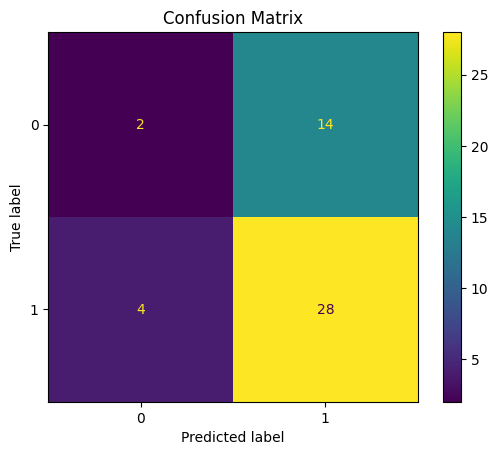

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.12      0.18        16
           1       0.67      0.88      0.76        32

    accuracy                           0.62        48
   macro avg       0.50      0.50      0.47        48
weighted avg       0.56      0.62      0.57        48



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred_time = (best_model_time.predict(X_test_time) > 0.5).astype("int32")
test_accuracy_time = accuracy_score(y_test_time, y_pred_time)
print(f"Test Accuracy: {test_accuracy_time * 100:.2f}%")

conf_matrix_time = confusion_matrix(y_test_time, y_pred_time)

ConfusionMatrixDisplay(conf_matrix_time).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

report_time = classification_report(y_test_time, y_pred_time)
print("Classification Report:")
print(report_time)




# Frequency Test Accuracy

Test Accuracy: 60.42%


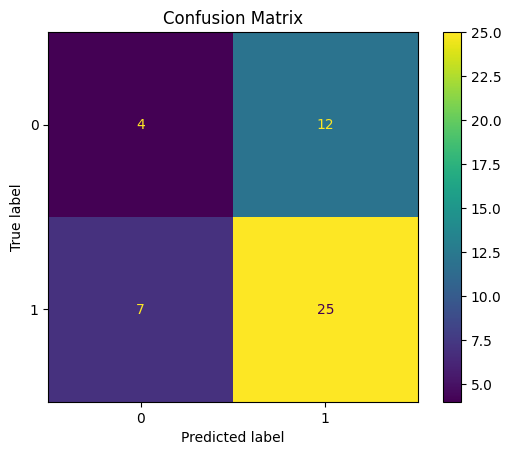

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.25      0.30        16
           1       0.68      0.78      0.72        32

    accuracy                           0.60        48
   macro avg       0.52      0.52      0.51        48
weighted avg       0.57      0.60      0.58        48



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred_frequency = (best_model_frequency.predict(X_test_frequency) > 0.5).astype("int32")

test_accuracy_frequency = accuracy_score(y_test_frequency, y_pred_frequency)
print(f"Test Accuracy: {test_accuracy_frequency * 100:.2f}%")

conf_matrix_frequency = confusion_matrix(y_test_frequency, y_pred_frequency)

ConfusionMatrixDisplay(conf_matrix_frequency).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

report_frequency = classification_report(y_test_frequency, y_pred_frequency)
print("Classification Report:")
print(report_frequency)

# Combined Test Accuracy


Test Accuracy: 64.58%


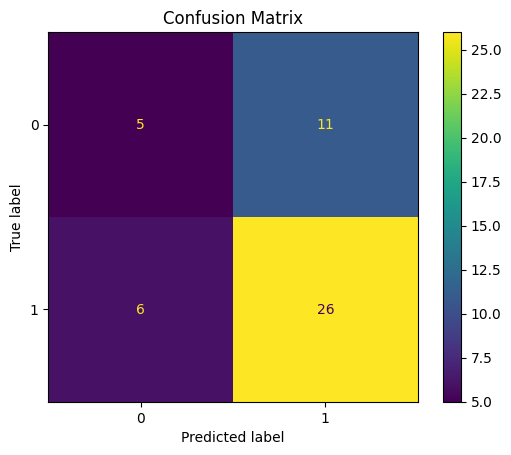

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.31      0.37        16
           1       0.70      0.81      0.75        32

    accuracy                           0.65        48
   macro avg       0.58      0.56      0.56        48
weighted avg       0.62      0.65      0.63        48



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred_time_frequency = (best_model_time_frequency.predict(X_test_time_frequency) > 0.5).astype("int32")

test_accuracy_time_frequency = accuracy_score(y_test_time_frequency, y_pred_time_frequency)
print(f"Test Accuracy: {test_accuracy_time_frequency * 100:.2f}%")

conf_matrix_time_frequency = confusion_matrix(y_test_time_frequency, y_pred_time_frequency)

ConfusionMatrixDisplay(conf_matrix_time_frequency).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

report_time_frequency = classification_report(y_test_time_frequency, y_pred_time_frequency)
print("Classification Report:")
print(report_time_frequency)

# Important Position Test Accuracy

Test Accuracy: 62.50%


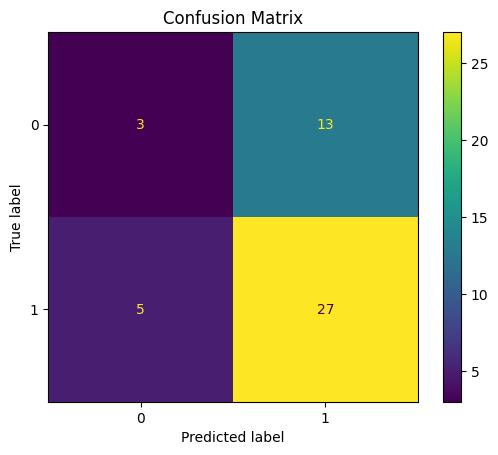

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.19      0.25        16
           1       0.68      0.84      0.75        32

    accuracy                           0.62        48
   macro avg       0.53      0.52      0.50        48
weighted avg       0.58      0.62      0.58        48



In [ ]:
y_pred_important_positions = (best_model_important_positions.predict(X_test_important_positions) > 0.5).astype("int32")

test_accuracy_important_positions = accuracy_score(y_test_important_positions, y_pred_important_positions)
print(f"Test Accuracy: {test_accuracy_important_positions * 100:.2f}%")

conf_matrix_important_positions = confusion_matrix(y_test_important_positions, y_pred_important_positions)

ConfusionMatrixDisplay(conf_matrix_important_positions).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

report_important_positions = classification_report(y_test_important_positions, y_pred_important_positions)
print("Classification Report:")
print(report_important_positions)

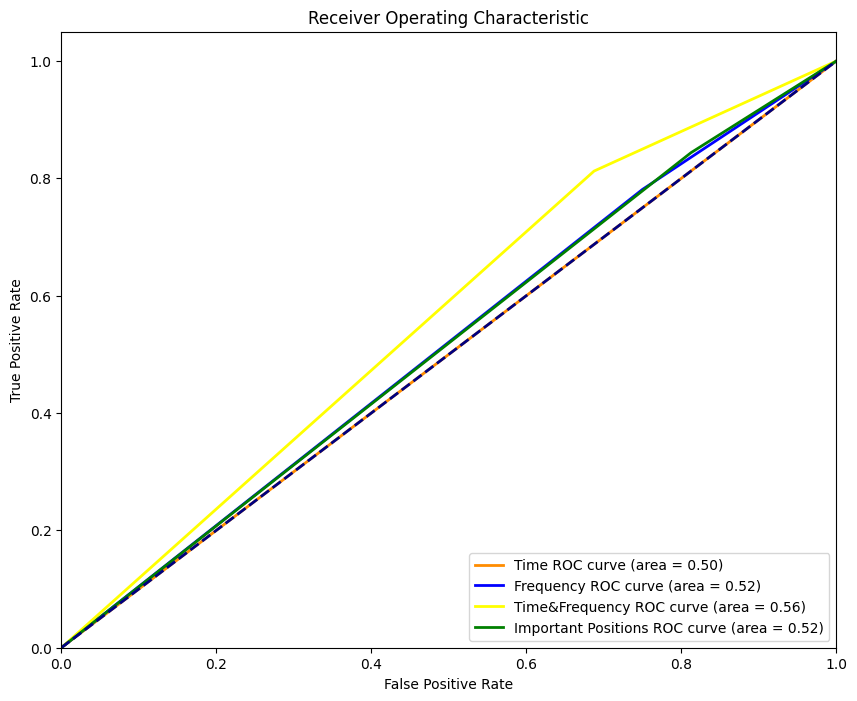

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_probs_time = best_model_time.predict(X_test_time).ravel()
y_pred_probs_frequency = best_model_frequency.predict(X_test_frequency).ravel()
y_pred_probs_time_frequency = best_model_time_frequency.predict(X_test_time_frequency).ravel()
y_pred_probs_important_positions = best_model_important_positions.predict(X_test_important_positions).ravel()  # New model

fpr_time, tpr_time, thresholds_time = roc_curve(y_test_time, y_pred_probs_time)
roc_auc_time = auc(fpr_time, tpr_time)

fpr_frequency, tpr_frequency, thresholds_frequency = roc_curve(y_test_frequency, y_pred_probs_frequency)
roc_auc_frequency = auc(fpr_frequency, tpr_frequency)

fpr_time_frequency, tpr_time_frequency, thresholds_time_frequency = roc_curve(y_test_time_frequency, y_pred_probs_time_frequency)
roc_auc_time_frequency = auc(fpr_time_frequency, tpr_time_frequency)

fpr_important_positions, tpr_important_positions, thresholds_important_positions = roc_curve(y_test_important_positions, y_pred_probs_important_positions)  # New ROC computation
roc_auc_important_positions = auc(fpr_important_positions, tpr_important_positions)  # New AUC computation

plt.figure(figsize=(10, 8))
plt.plot(fpr_time, tpr_time, color='darkorange', lw=2, label='Time ROC curve (area = %0.2f)' % roc_auc_time)
plt.plot(fpr_frequency, tpr_frequency, color='blue', lw=2, label='Frequency ROC curve (area = %0.2f)' % roc_auc_frequency)
plt.plot(fpr_time_frequency, tpr_time_frequency, color='yellow', lw=2, label='Time&Frequency ROC curve (area = %0.2f)' % roc_auc_time_frequency)
plt.plot(fpr_important_positions, tpr_important_positions, color='green', lw=2, label='Important Positions ROC curve (area = %0.2f)' % roc_auc_important_positions)  # New curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()